# Feedforward Neural Network
Write your own neural network whose weight updated by back propagation algorithms.

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

## Implement Single Layer Unit
implement forward propagation and backward propagation of each layer unit.

### Affine Layer
#### Math Formula

$$
y=xW+b
$$

#### Optimization Method
using Batch Gradient Descent to update weight of the model

In [2]:
class Affine:
    def __init__(self,m,n):
        self.W = np.random.rand(m,n)
        self.b = np.random.rand(1,n)

    def forward(self,x):
        self.x = x
        return x@self.W+self.b

    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

    def backward(self,grad):
        self.dW = self.x.T@grad
        self.db = np.sum(grad, axis=0)
        dx = grad@self.W.T
        return dx   

### ReLu Function Unit
#### Math Formula
$$
y=
\begin{cases}
0,\quad x\leq0\\
x,\quad x>0
\end{cases}
$$

In [3]:
class ReLu:
    def forward(self,x):
        self.threshold = 1 - (x < 0)
        return x*self.threshold
    def backward(self,grad):
        return grad*self.threshold

### Softmax Function Unit
#### Math Formula
$$
y = \frac{e^x}{\sum_j e^{x_j}}
$$

In [4]:
class Softmax:
    def forward(self,x):
        # avoid value overflow
        x = x - np.max(x,axis=1).reshape(-1,1)
        self.e_x = np.exp(x)
        self.sum = np.sum(self.e_x,axis=1).reshape(-1,1)
        return self.e_x/self.sum

    def backward(self,grad):
        return grad*(self.e_x*self.sum-self.e_x**2)/self.sum**2

### MSELoss Unit
#### Math Formula
$$
loss=\frac1m \sum_{i=1}^m\sum_{j=1}^n(h(x_j^{(i)})-y_j^{(i)})^2
$$

In [5]:
class MSELoss:
    def forward(self,pred,true):
        m = len(pred)
        self.pred = pred
        self.true = true
        return np.sum((pred-true)**2)/m
    
    def backward(self):
        return self.pred-self.true

## Build the neural network

bulid a 3-layers neural network

| Layer  | Size | Activation function |
| ------ | ---- | ------------------- |
| input  | 64   |                     |
| hidden | 96   | Relu                |
| ouput  | 10   | Softmax             |

In [6]:
class Model:
    def __init__(self,m,n,lr=.001):
        self.lr = lr
        self.affine1 = Affine(m,96)
        self.relu = ReLu()
        self.affine2 = Affine(96,n)
        # self.affine = Affine(m,n)
        self.softmax = Softmax()

    def forward(self,x):
        x = self.affine1.forward(x)
        x = self.relu.forward(x)
        x = self.affine2.forward(x)
        # x = self.affine.forward(x)
        self.y = self.softmax.forward(x)
        return self.y

    def backward(self,grad):
        grad = self.softmax.backward(grad)
        grad = self.affine2.backward(grad)
        grad = self.relu.backward(grad)
        grad = self.affine1.backward(grad)
        self.affine2.update(self.lr)
        self.affine1.update(self.lr)
        # grad = self.affine.backward(grad)
        # self.affine.update(self.lr)
        return grad

## Try with MNIST
### Load dataset and preprocessing

In [7]:
from sklearn.datasets import load_digits

dataset = load_digits()
X = dataset.data
y = dataset.target.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder,StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = encoder.fit_transform(y).toarray()

### dataset split

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

### Train the model

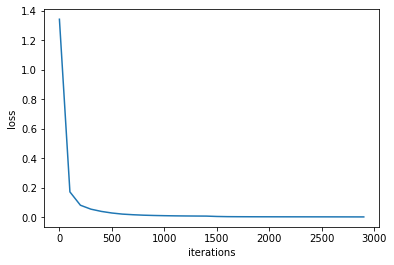

In [9]:
model = Model(64,10)
mseloss = MSELoss()

epoches = 3000
iteration = []
losses = []
for i in range(epoches):
    y_pred = model.forward(X_train)
    loss = mseloss.forward(y_pred,y_train)

    assert not np.isnan(loss)
    if i % 100 is 0:
        # print(f'epoch: {i}, loss: {loss}')
        iteration.append(i)
        losses.append(loss)
    grad = mseloss.backward()
    model.backward(grad)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(iteration,losses)

## Evalue the result

In [10]:
y_pred = encoder.inverse_transform(model.forward(X_test))
y_true = encoder.inverse_transform(y_test)
result = pd.DataFrame(np.hstack((y_pred,y_true)),columns=['pred','true'])
result

,pred,true
0,6,6
1,7,7
2,2,8
3,8,8
4,3,3
...,...,...
445,1,1
446,9,9
447,7,7
448,6,6


In [11]:
from sklearn.metrics import accuracy_score

accuracy = int(100*round(accuracy_score(y_true,y_pred),2))

print(f'accuracy: {accuracy}%')

accuracy: 95%
